# EE 538: Analog Integrated Circuit Design

## Winter 2021

## Instructor: Jason Silver

## Python packages/modules

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def nmos_iv_sweep(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = []
    
    for i in range(len(V_ds)):
        I_d.append(np.piecewise(V_ds[i], [V_ds[i] < V_ov, V_ds[i] >= V_ov],
                       [u_n*C_ox*(W/Leff)*(V_gs - V_thn - V_ds[i]/2)*V_ds[i]*(1+lmda*V_ds[i]) , 
                        0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds[i])])) 
    
    return np.array(I_d)

def pmos_iv_sweep(V_sg, V_sd, W, L, lmda):
    u_p = 100                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thp = -0.8                # threshold voltage (device parameter)
    V_ov = V_sg - np.abs(V_thp)
    Ldp = 0.09e-6
    Leff = L - 2*Ldp
    
    I_d = []
    
    for i in range(len(V_sd)):
        I_d.append(np.piecewise(V_sd[i], [V_sd[i] < V_ov, V_sd[i] >= V_ov],
                       [u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp) - V_sd[i]/2)*V_sd[i]*(1+lmda*V_sd[i]) , 
                        0.5*u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp))**2*(1+lmda*V_sd[i])])) 
    
    return np.array(I_d)

def nmos_iv_sat(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = 0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds)
    
    return I_d

# Lecture 4 - Biasing of Analog Circuits

## Announcements

 - Assignment 3 posted, due Sunday January 31
     - PDF submission on Canvas

## Week 4

 - Chapter 3 of Razavi (single-stage amplifiers)
     - Section 3.6 Cascode Stage
 - Chapter 5 of Razavi (current mirrors)
     - Section 5.1 Basic Current Mirrors
     - Section 5.2 Cascode Current Mirrors

## Overview

 - Last time...
     - Source degeneration
     - Cascode current mirror
     - Cascode amplifier
     - Body effect
     - Cascode biasing
 - Today...
    - Amplifier output swing
    - Current references
    - Low-voltage cascode biasing

## Output swing: common-source amplifier

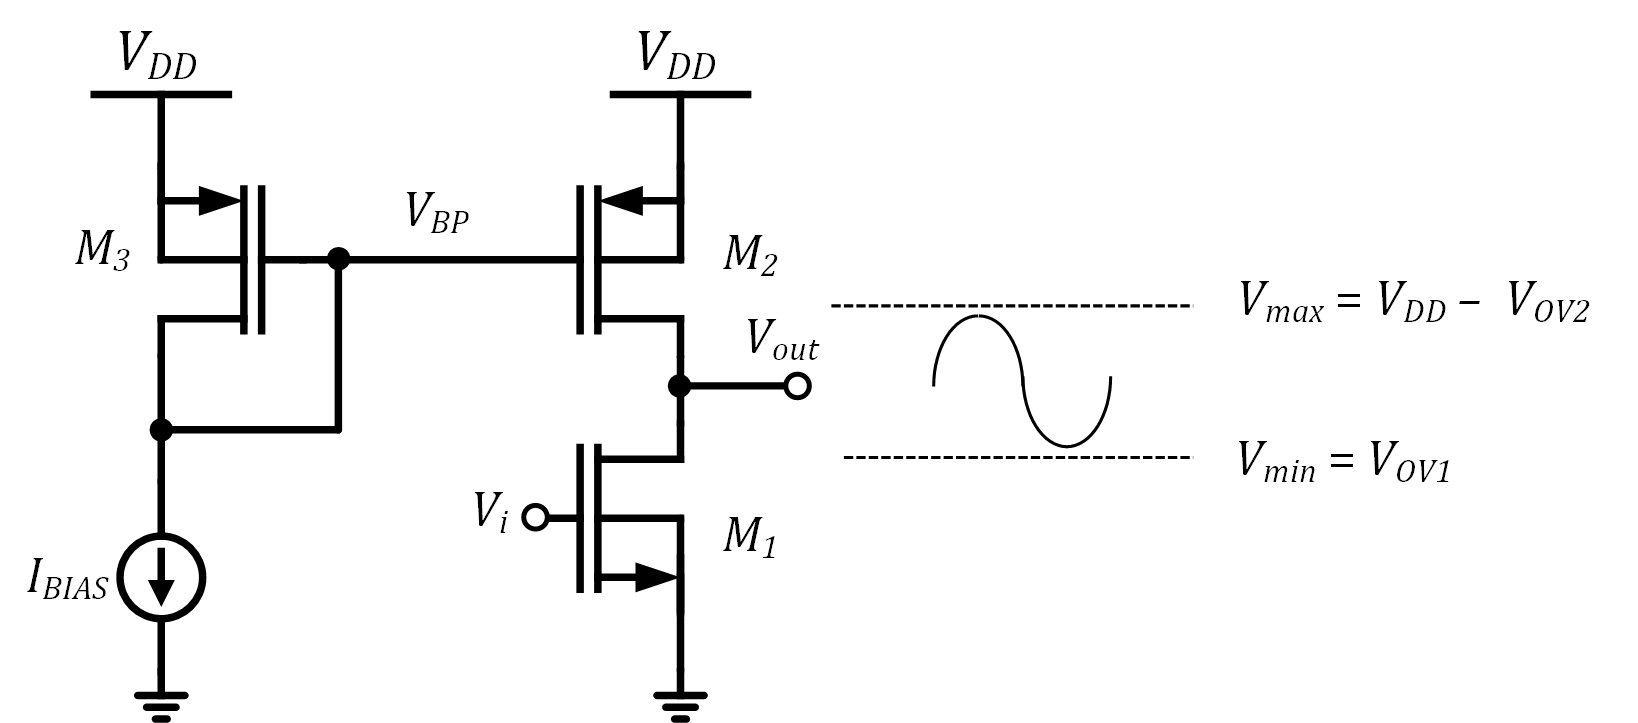

\begin{align}
V_{swing} &= V_{max} - V_{min}\\
&= V_{DD} - V_{OV2} - V_{OV1}\\
&\approx \boxed{ V_{DD} - 2V_{OV} }
\end{align}

 - The output swing of a common source stage is $V_{DD} – 2V_{OV}$
 
 - Common source amplifier thus requires an “overhead” of $2V_{OV}$
 
 - This structure is often used where wide output swing is required

## Output swing: CS with source-degenerated load

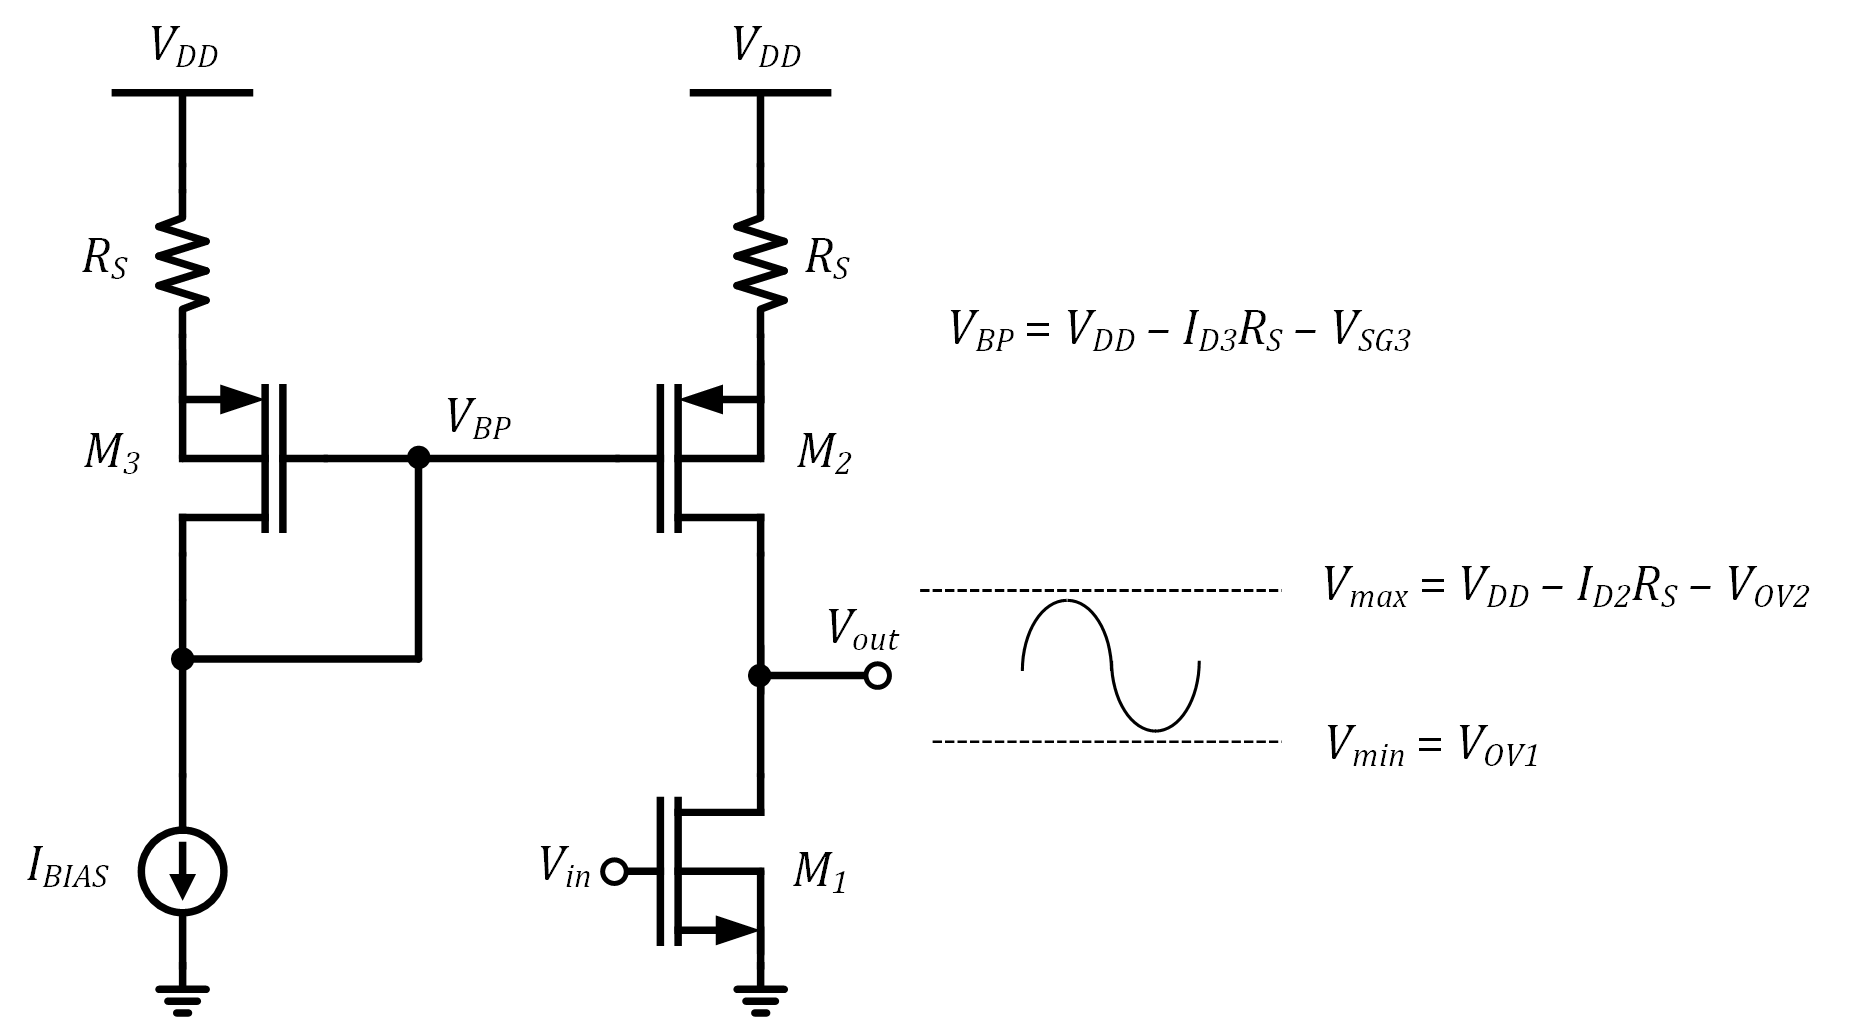

\begin{align}
V_{swing} &= V_{max} - V_{min}\\
&= V_{DD} - I_{D2}R_S - V_{OV2} - V_{OV1}\\
&\approx \boxed{ V_{DD} - I_{D2}R_S - 2V_{OV} }
\end{align}

 - Degenerated load adds $I_D R_S$ overhead
 
 - Overhead depends on value of $R_S$, as does $R_o$ (tradeoff between gain and headroom)
 
 - Simple structure, only requires the addition of resistors but no additional bias transistors

## Output swing: cascode amplifier

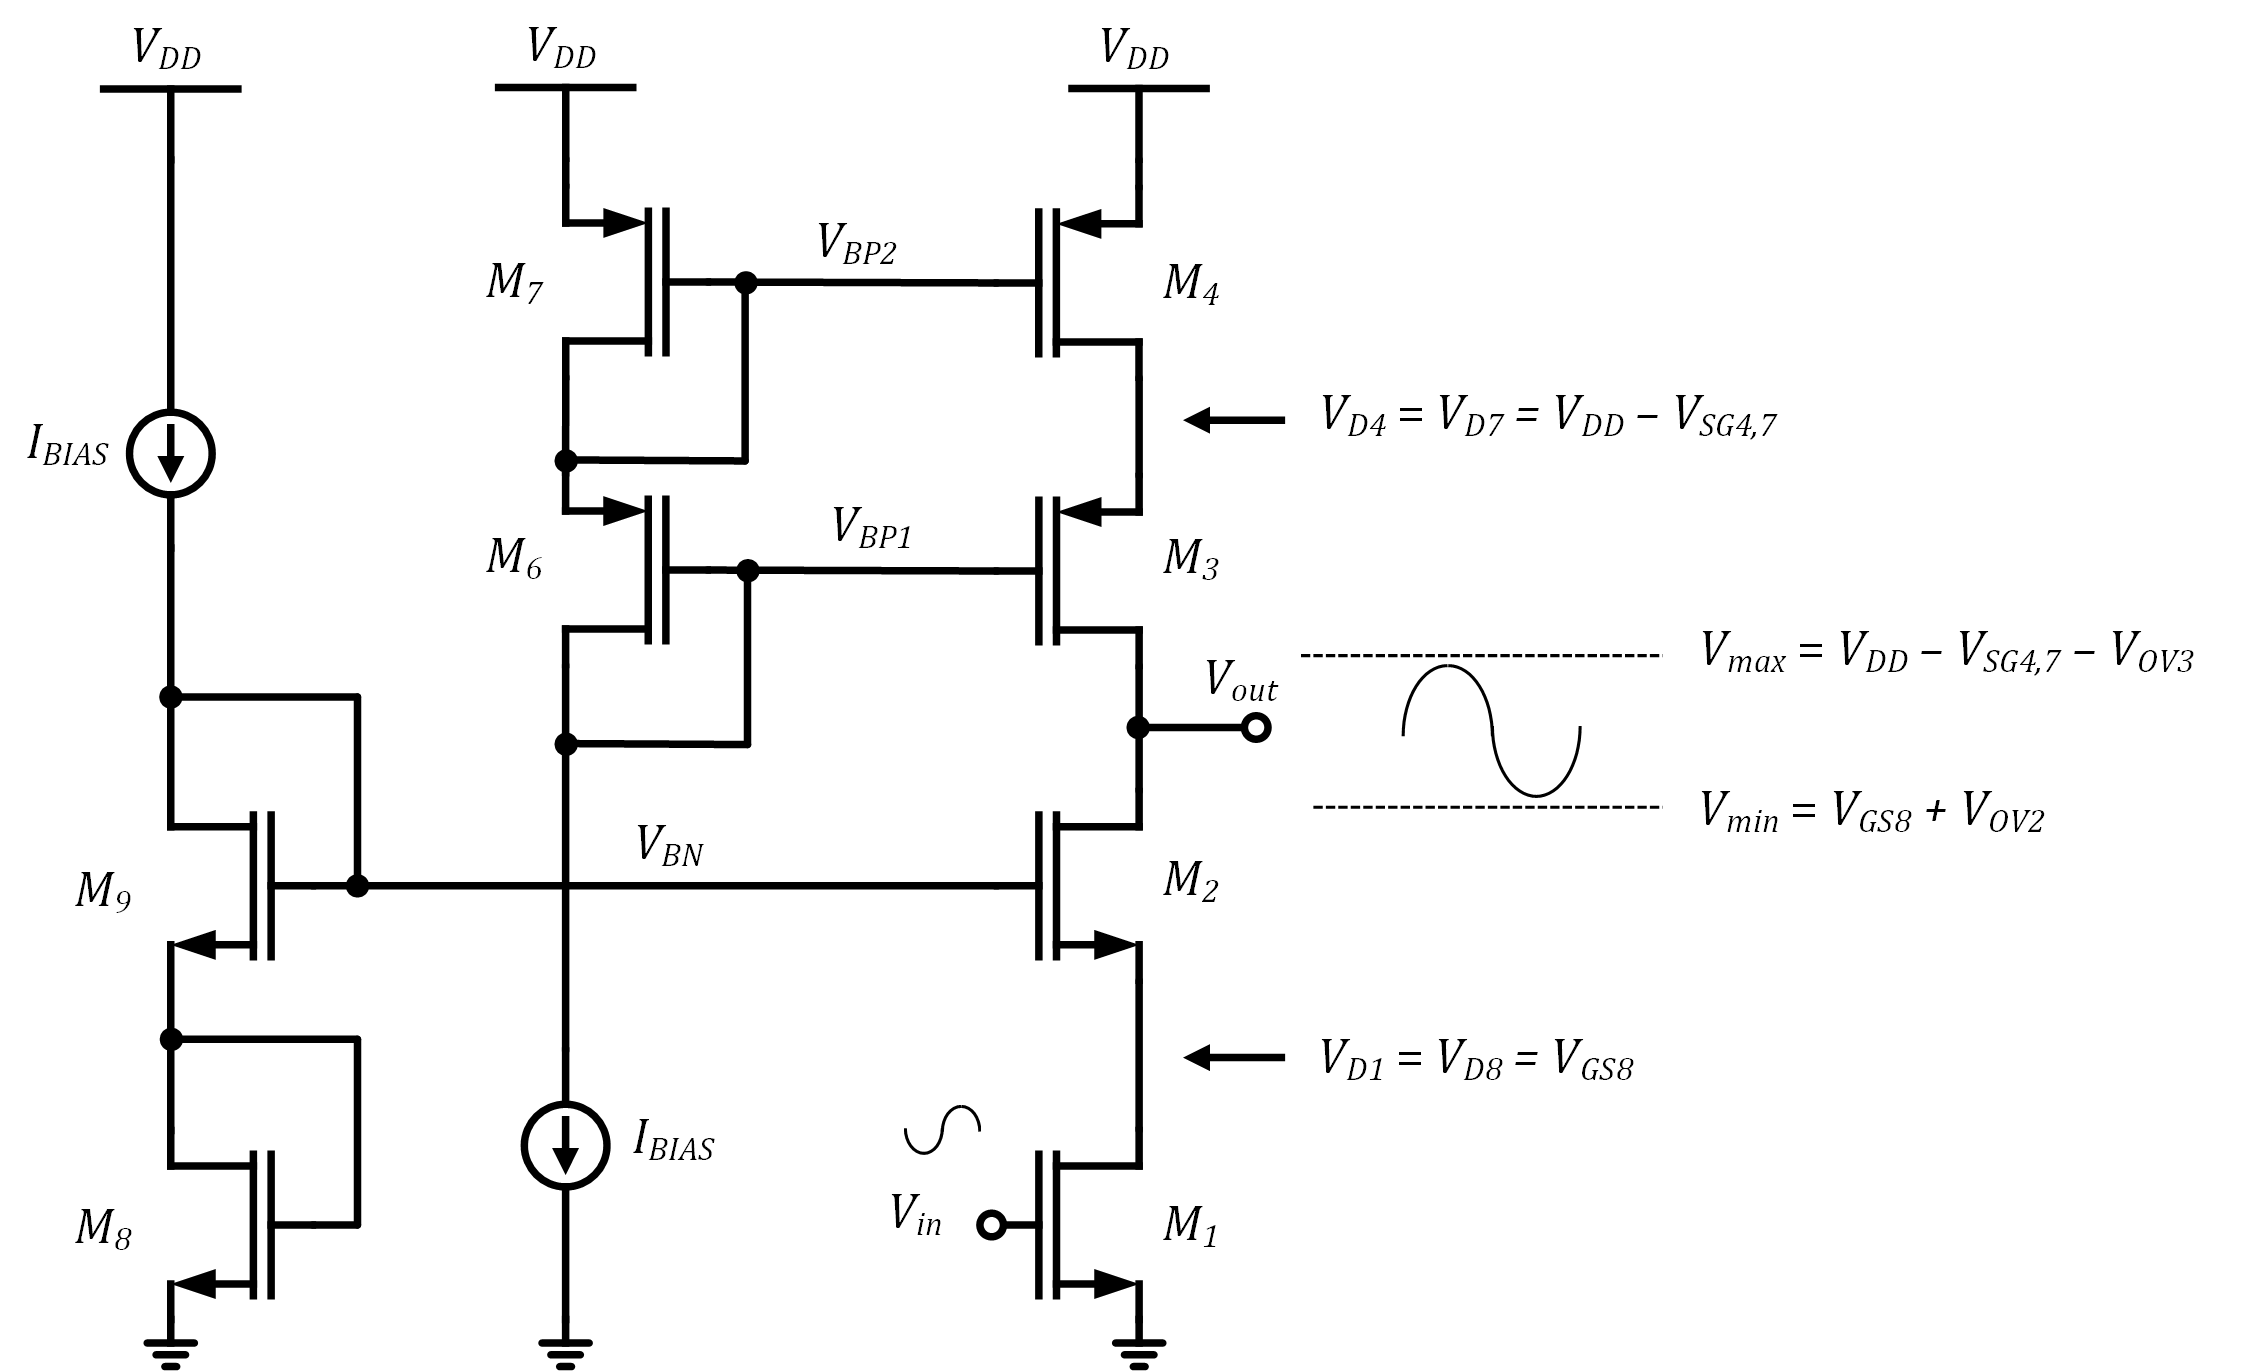

\begin{align}
V_{swing} &= V_{max} - V_{min}\\
&= V_{DD} - V_{SG,4,7} - V_{OV3} - V_{GS8} - V_{OV2}\\
&\approx \boxed{ V_{DD} - 2V_{GS} - 2V_{OV} }
\end{align}

 - Diode-connections of $M_7$ and $M_8$ add $V_{SG}$, $V_{GS}$ overhead
 
 - $V_{GS} \geq V_{th}$, typically, so headroom depends on device threshold(s)
 
 - Need a means of biasing the cascode amplifier that uses less headroom

## Biasing of MOS circuits

 - Design of MOS circuits involves selection of drain currents and aspect ratios ($W/L$) for all devices in a circuit
 
 - The combination of drain current and $W/L$ determines the *current density* of each device, $I_D/W
$, which in turn sets the overdrive voltage $V_{OV}$

 - For example, if we ignore channel-length modulation MOS drain current is given by

\begin{equation}
I_D \approx \dfrac{1}{2}\mu C_{ox} \dfrac{W}{L}V_{OV}^2
\end{equation}

 - Assuming a constant value for $L$, this results in a direct dependence of overdrive on drain current density

\begin{equation}
V_{OV} = \sqrt{\dfrac{2I_D}{\mu C_{ox} \dfrac{W}{L}}} = \sqrt{\dfrac{I_D}{W}\cdot\dfrac{2L}{\mu C_{ox}}}
\end{equation}

 - As a result, the voltage headroom (i.e. swing) of a circuit is determined by the current densities of transistors in the signal path


## Simple current reference

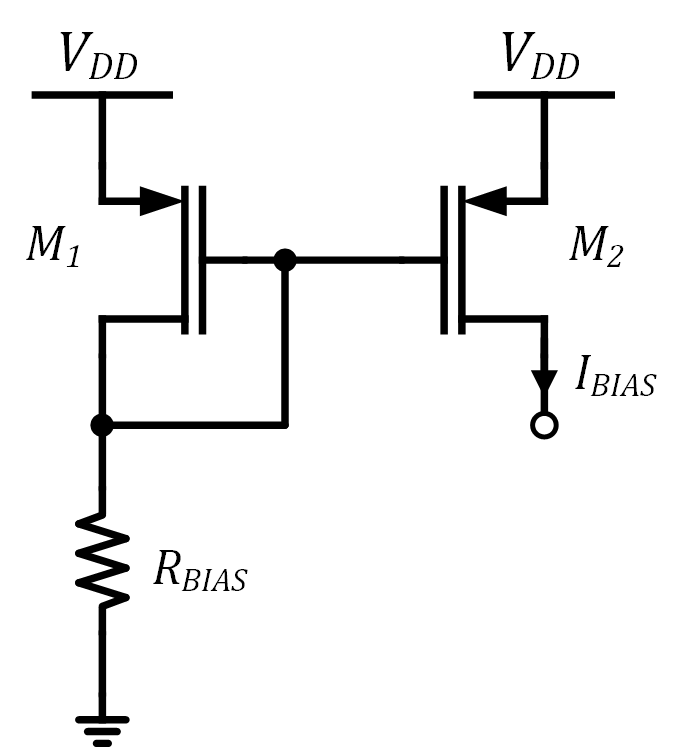

 - The current in $M_1$ is set by the voltage drop across $R_{BIAS}$

\begin{equation}
I_{D1} = \dfrac{V_{DD}-V_{SG1}}{R_{BIAS}}
\end{equation}

 - $V_{SG}$ of $M_1$ is given by
 
\begin{equation}
V_{SG1} = |V_{thp}| + \sqrt{\dfrac{2I_{D1}}{\mu_p C_{ox}\left(\frac{W}{L}\right)_1}}
\end{equation}

 - A simple current reference can be created using a diode-connected MOS device in series with a resistance between $V_{DD}$ and ground
 
 - However, variations in (primarily) $V_{DD}$, $V_{thp}$, and $R_{BIAS}$ result in an $I_{BIAS}$ that vary significantly with manufacturing (process) and temperature
 
 - These variations are collectively known as "PVT" (process, voltage, temperature), and significant effort is invested in making analog circuits robust against these sources of variability
 

## Supply-independent reference

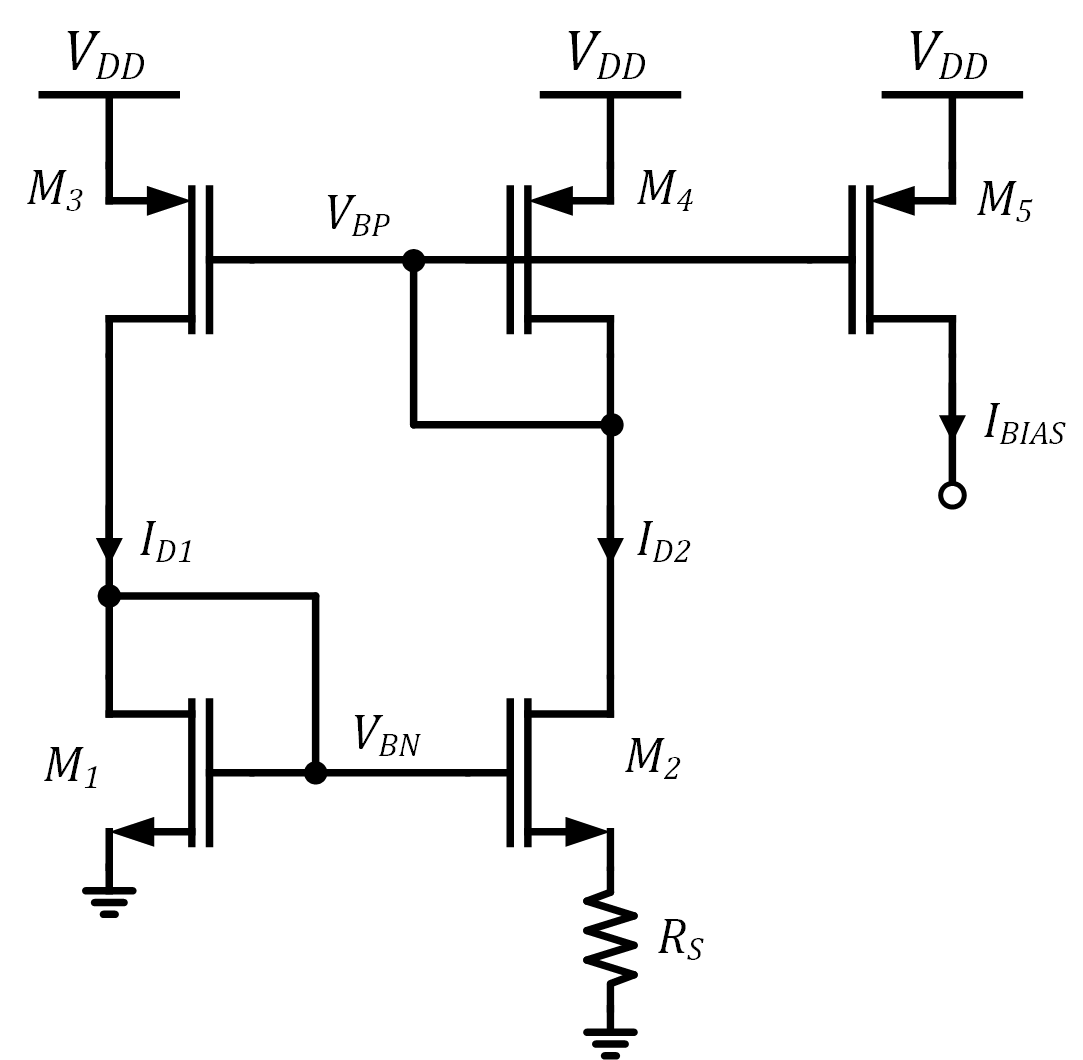

 - A more reliable means of generating bias currents involves "self-biased," supply-independent reference circuits

 - In the circuit depicted here, often called a "constant $g_m$" reference, $I_{D2}$ is given by
 
\begin{equation}
I_{D2} = \dfrac{V_{S2}}{R_S} = \dfrac{V_{BN}-V_{GS2}}{R_S} = \dfrac{V_{GS1}-V_{GS2}}{R_S} = \dfrac{\Delta V_{GS}}{R_S}
\end{equation}

 - $\Delta V_{GS}$ depends on the ratio of $(W/L)_2$ to $(W/L)_1$, which is independent of $V_{DD}$ 

## Cascode current mirror

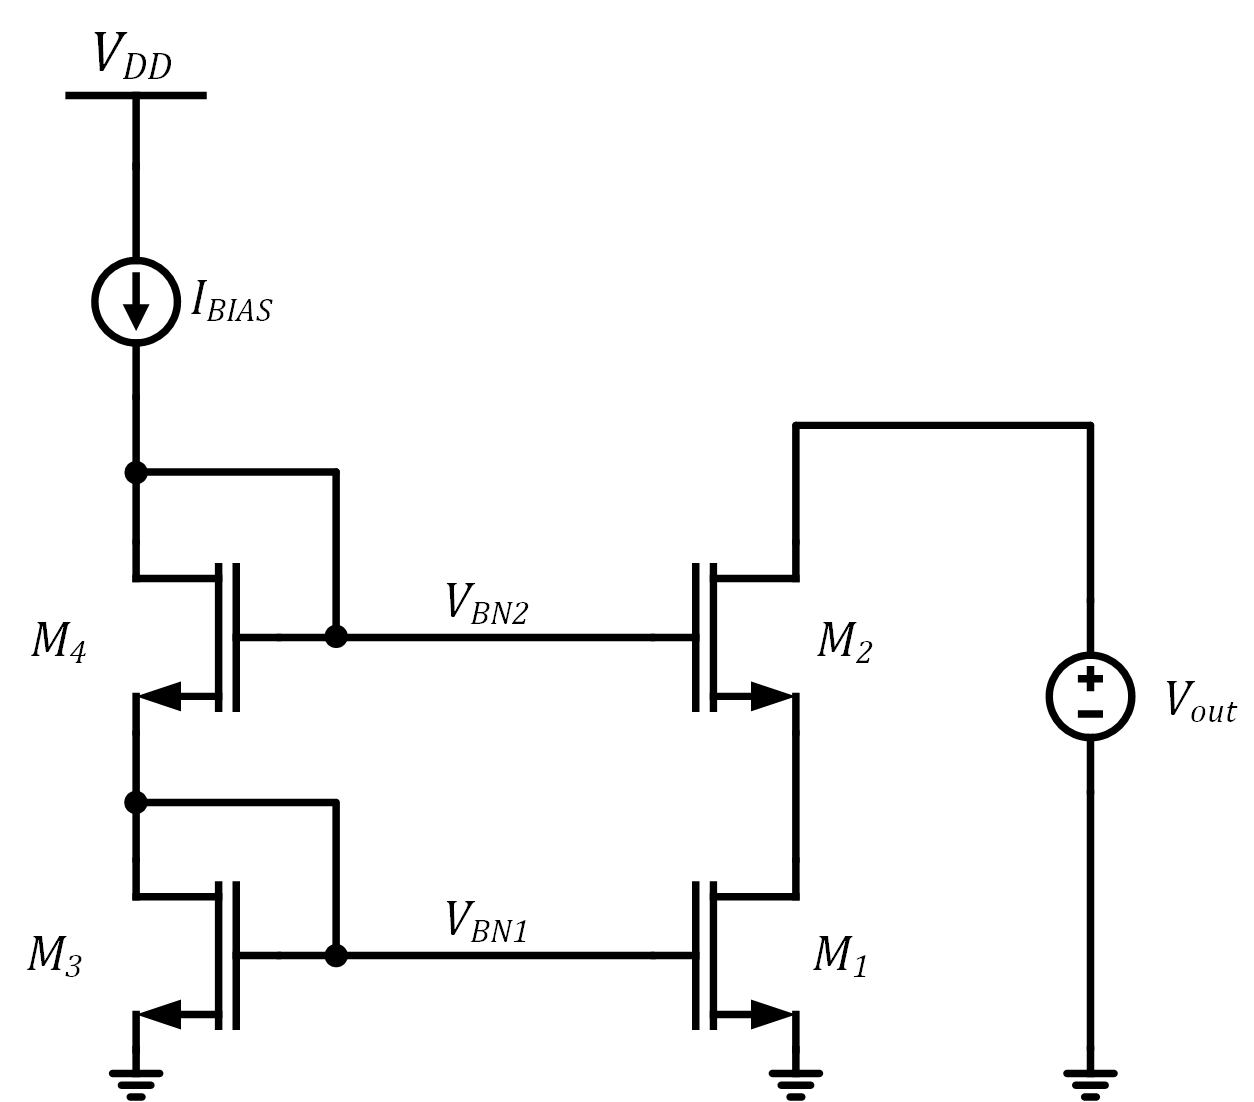

 - Assuming $I_{D1} = I_{D3}$, we can write

\begin{equation}
V_{S2} = V_{D1} = V_{GS3} = V_{GS1}
\end{equation}

- To keep $M_2$ in saturation, $V_{out}$ needs to satisify

\begin{equation}
V_{out} - V_{S2} > V_{GS2} - V_{th2} 
\end{equation}

- This sets the minimum value of $V_{out}$ to be

\begin{equation}
V_{out} > V_{GS1} + V_{GS2} - V_{th2} = V_{GS1} + V_{OV2}
\end{equation}

 - Cascode current mirrors are employed everywhere high precision (or high gain) is needed
 
 - However, the basic cascode current mirror has a headroom problem, because $V_{out}$ needs to be greater than $2V_{OV}$ to ensure saturation for both $M_1$ and $M_2$
 
 - To improve upon this, we need to modify the approach used to generate $V_{BN1}$ and $V_{BN2}$

## Low-voltage cascode bias

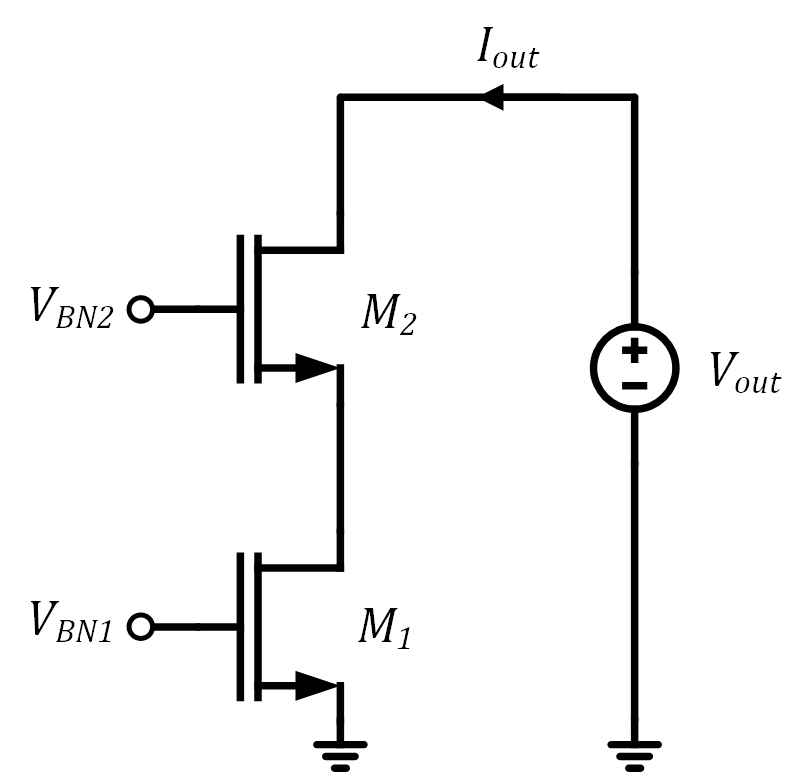

 
 - To minimize the headroom required by the cascode current source, $M_2$ should be biased such that 
 
\begin{equation}
V_{S2} = V_{D1} \approx V_{OV1}
\end{equation}

 - We can achieve this by selecting a value for $V_{BN2}$ that satisfies
 
\begin{equation}
V_{BN2} = V_{OV1} + V_{GS2}
\end{equation}

 - In this case, the minimum output voltage would be given by
 
\begin{equation}
V_{out} > V_{OV1} + V_{OV2} \approx 2V_{OV}
\end{equation}

 - How can we generate $V_{BN1}$ and $V_{BN2}$ to achieve this? 

## Generation of V<sub>BN1</sub>

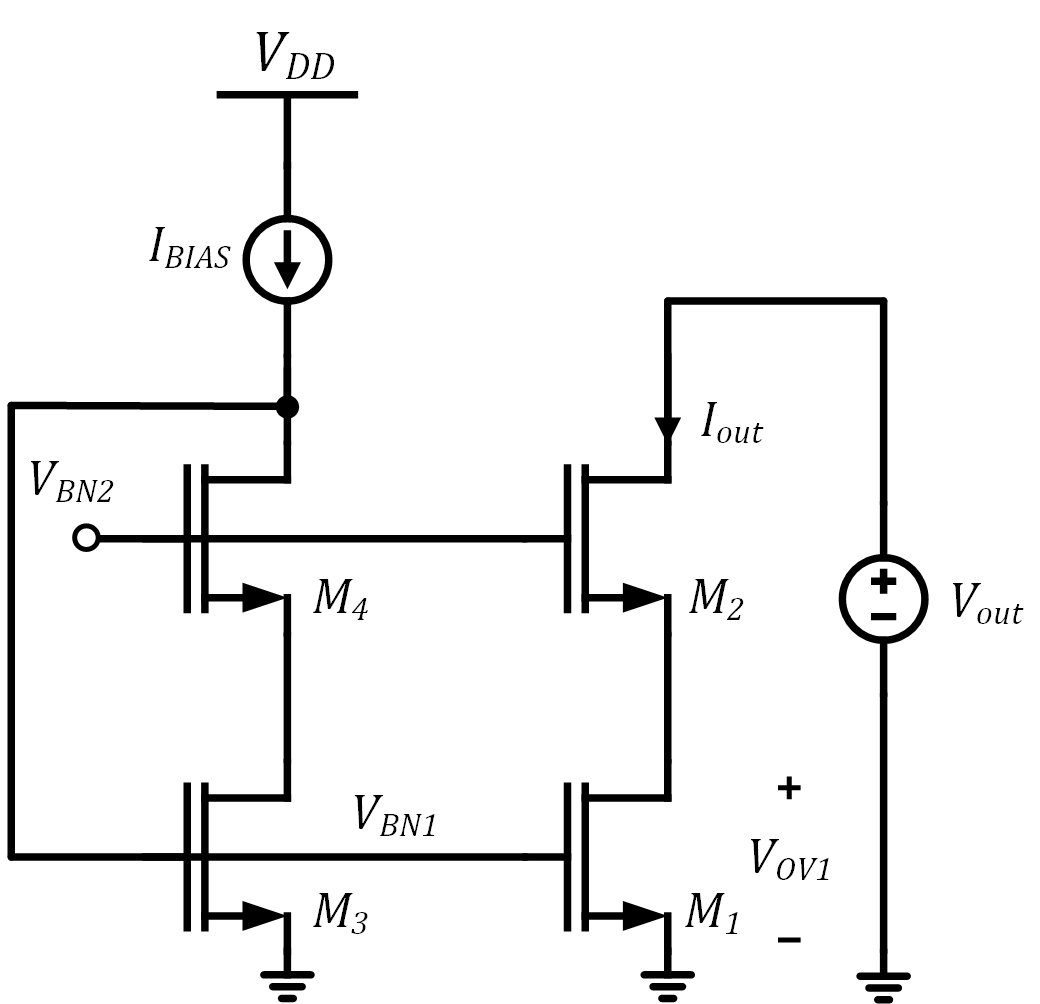

 
 - $V_{BN1}$ is generated by diode-connecting $M_3$ ($M_3$ and $M_1$ form a current mirror)
 
 - The presence of $M_4$ does not affect the value of $V_{BN1}$, but $V_{BN1}$ needs to be high enough to keep $M_4$ in saturation
 
 - Our goal is to select a value of $V_{BN2}$ that is high enough to keep $M_1$ ($M_3$) in saturation, but no higher than this
 
 - Once again, if we assume that the drain voltage of $M_1$ is *exactly* equal to $V_{OV1}$, the minimum value of $V_{out}$ will be $V_{OV1} + V_{OV2}$
 
 - The value of $V_{BN2}$ that achieves this is
 
\begin{equation}
V_{BN2} = V_{OV1} + V_{GS4}
\end{equation}

## Generation of V<sub>BN2</sub>

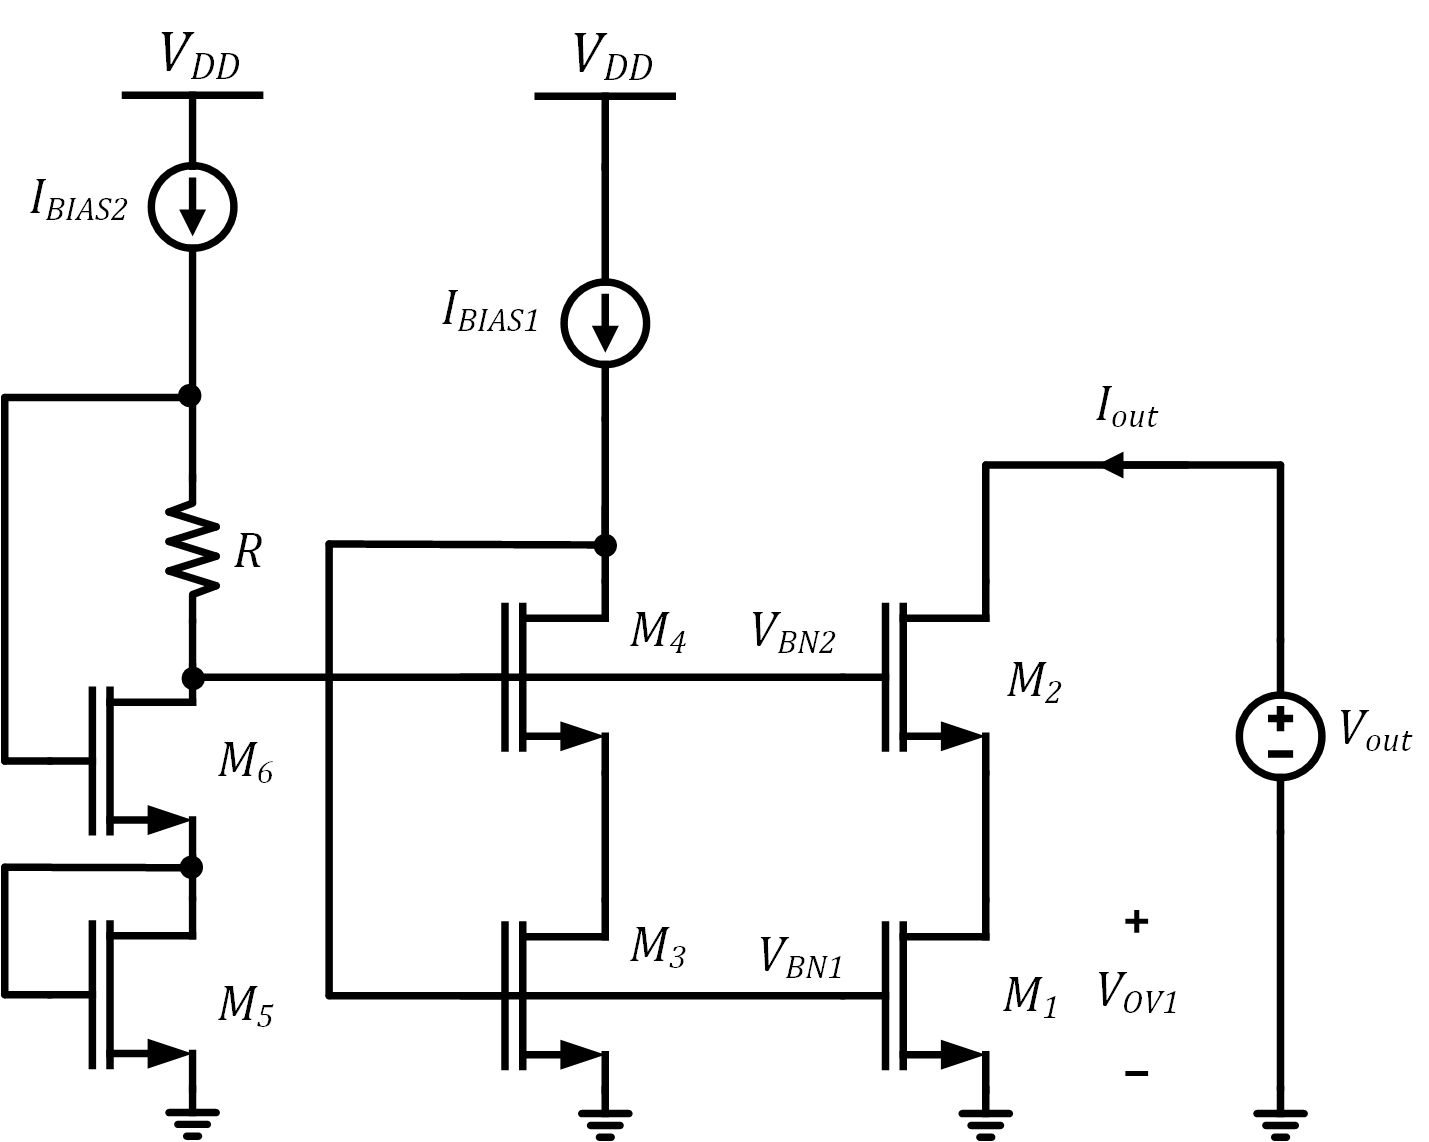

 
 - One method of generating $V_{BN2}$ is shown here
 
 - Remember, we just need to ensure that
 
\begin{equation}
V_{BN2} = V_{OV1} + V_{GS2}
\end{equation}

 - To achieve this, we note that

\begin{equation}
V_{BN2} = V_{GS5} + V_{GS6} - I_{BIAS2}\cdot R
\end{equation}

 - This results in the following condition for the resistance $R$
 
\begin{align}
R &= \dfrac{V_{GS5} + V_{GS6} - V_{BN2} }{I_{BIAS2}} = \dfrac{V_{GS5} + V_{GS6} - V_{OV1} - V_{GS2} }{I_{BIAS2}}
\end{align}

 - If all values of $V_{GS}$ are considered to be approximately equal, this results in
 
\begin{equation}
R \approx \dfrac{V_{thn}}{I_{BIAS2}}
\end{equation}

## Low-overhead PMOS cascode bias

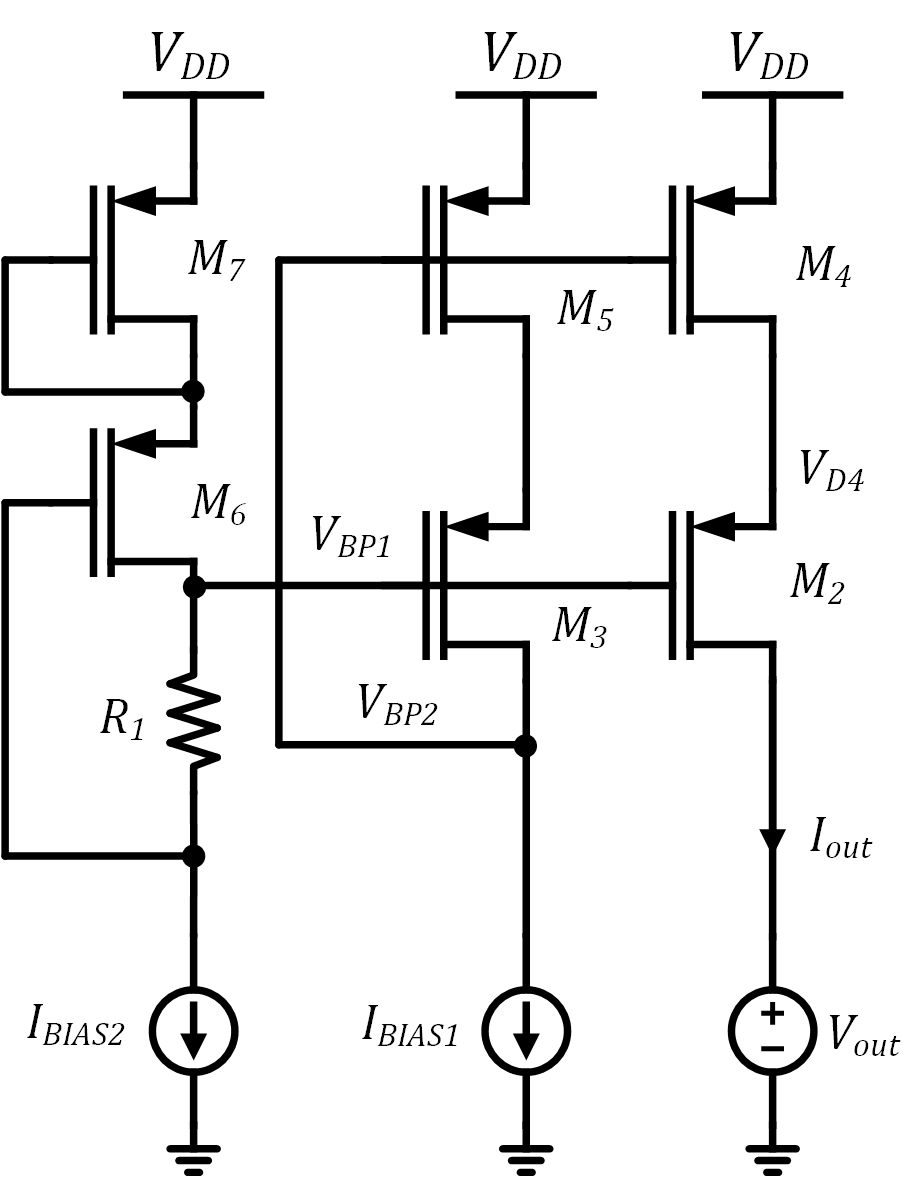

 - To guarantee saturation for $M_2$ and $M_4$ and use minimal headroom, we need to ensure that

\begin{equation}
V_{BP1} \approx V_{DD} - V_{OV4} - V_{SG2}
\end{equation}

 - As with the $NMOS$ version of the circuit, the above expression  needs to be related to the following
 
\begin{equation}
V_{BP1} = V_{DD} - V_{SG7} - V_{SG6} + I_{BIAS2}\cdot R_1
\end{equation}

 - Equation the two results in an expression for $R_1$ that we can use for design:
 
\begin{equation}
R_1 = \dfrac{V_{SG7}+V_{SG6}-V_{SG2}-V_{OV4}}{I_{BIAS2}}
\end{equation}

## Alternate realization of V<sub>BN2</sub> (self-biased cascode)

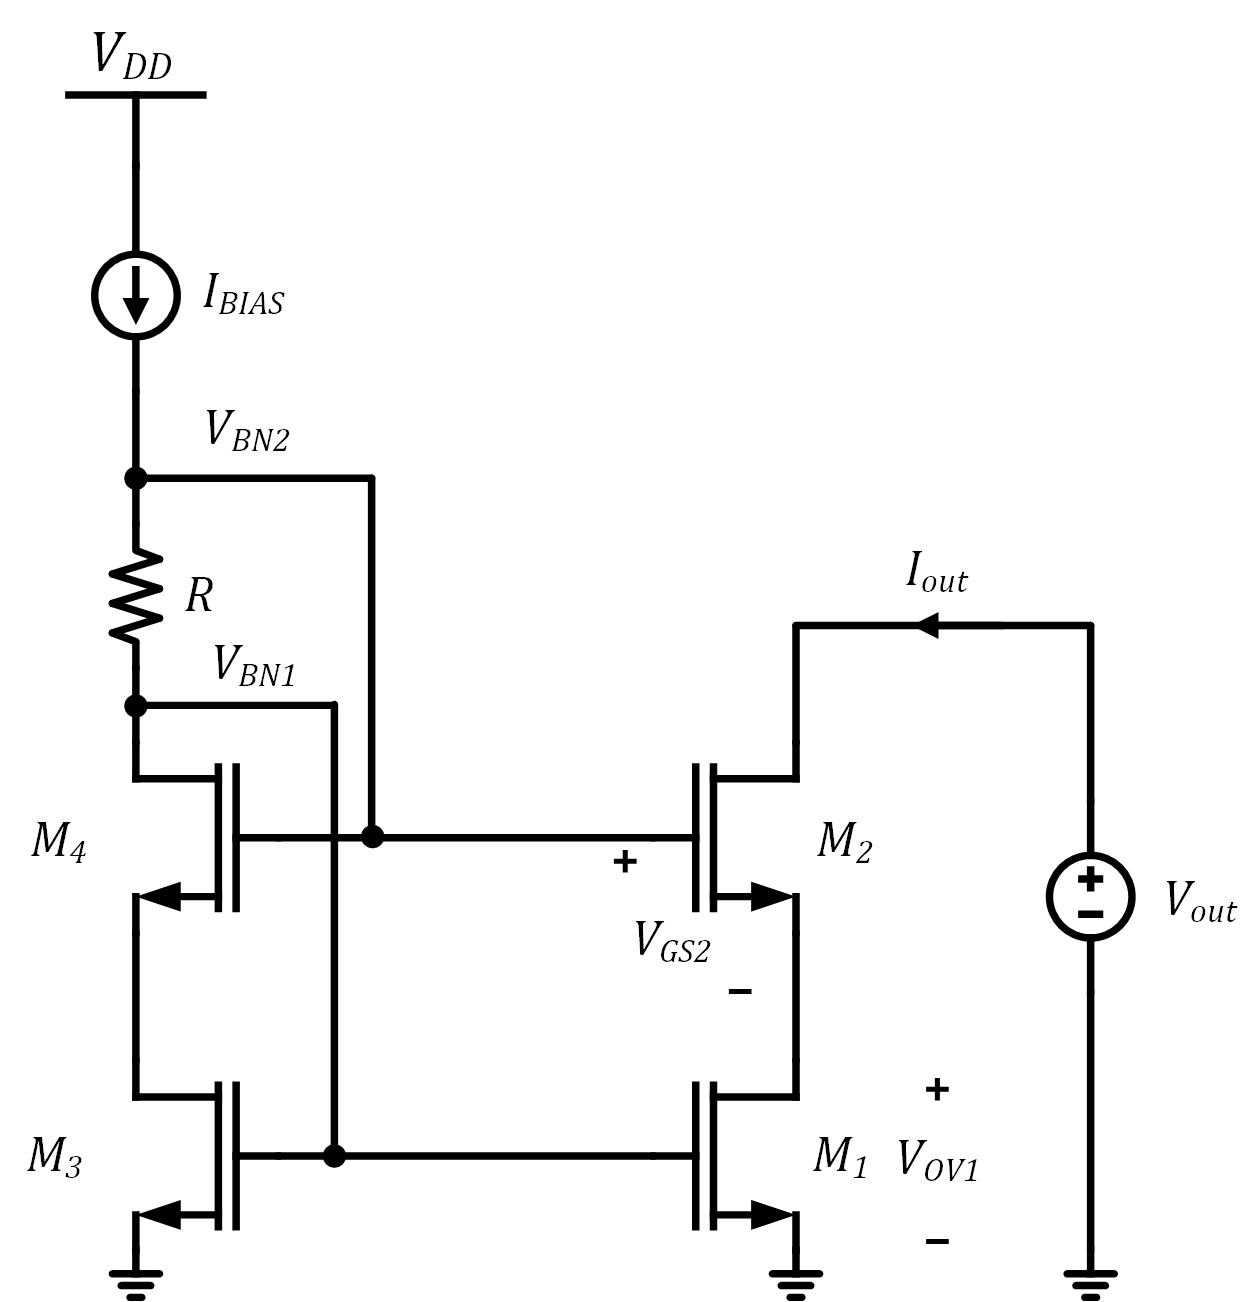

 
 - One disadvantage of the previous biasing schemes is the need for an extra current branch, which increases power and cirucuit area
 
 - The configuration here generates $V_{BN1}$ and $V_{BN2}$ without the additional current branch
 
 - $R$ should be selected such that

\begin{equation}
V_{BN1} + I_{BIAS}\cdot R = V_{OV1} + V_{GS2}
\end{equation}

 - This results in 
 
\begin{equation}
R = \dfrac{V_{GS2} - V_{th1}}{I_{BIAS}}
\end{equation}

 - Assuming $V_{th1} \approx V_{th2}$, the voltage drop across $R$ is equal to the overdrive voltage of $M_{2,4}$ (say, ~$200mV$)

 - Note that resistance and $MOS$ parameters will vary differently due to process and temperature, so $R$ should be selected to take this into account (simulations required)

## Loading effects

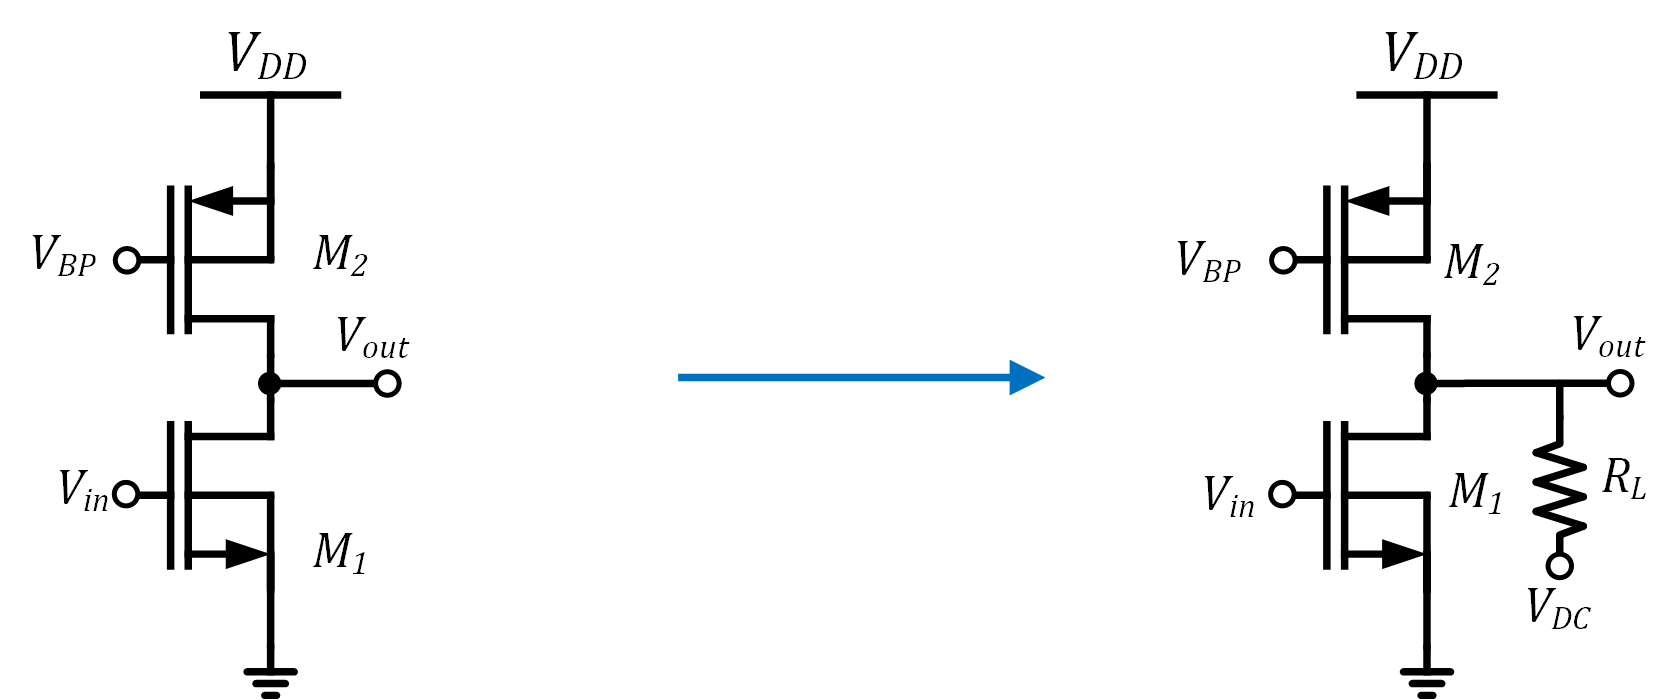

 - Gain in common-source (and related structures) is achieved with high output resistance
 
 - In our Level 1 process model, the output resistance of a cascode amplifier with $1mA$ bias current is roughly $500k\Omega$ ($g_m r_o^2/2$) 
 
 - If $R_L << R_o$, the gain is reduced to approximately $g_{m1}R_L$ 
 
 - Load resistance (e.g. in an opamp feedback network) decreases the gain of these amplifiers, an effect referred to as *loading*

## Source follower stage

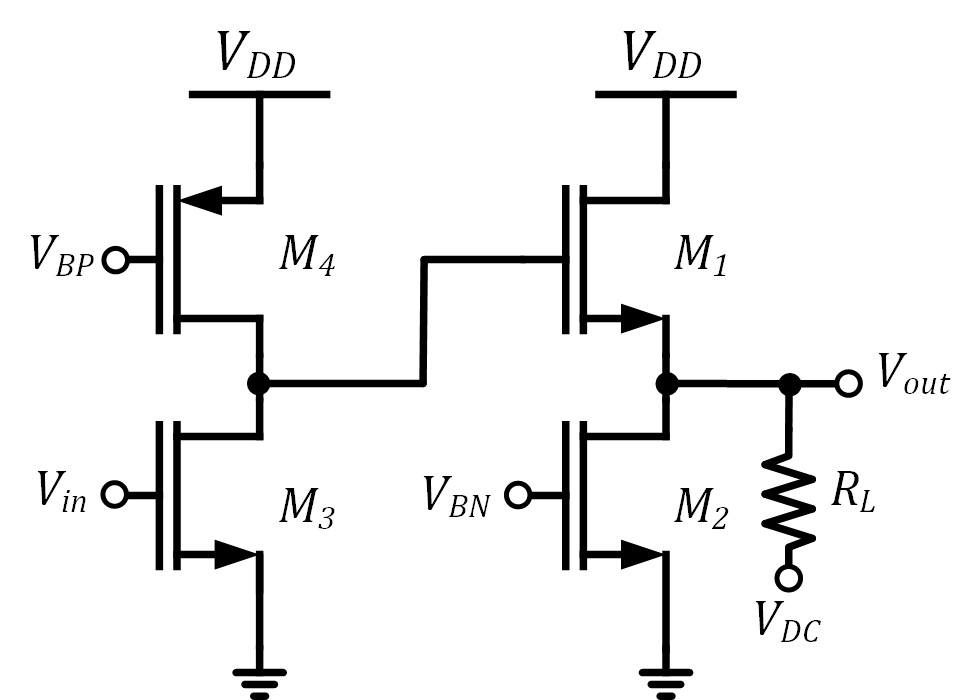

 - A source follower stage is often used to isolate/buffer the high output resistance of a gain stage from low-valued load resistances 
 
 - The output resistance of a source follower stage is approximately $1/g_m$, while the "gain" is approximately $1$
 
 - Due to the unity gain, we say the output (which is located at the source of the $g_m$ devices) "follows" the input at the gate

## Source-follower small-signal analysis

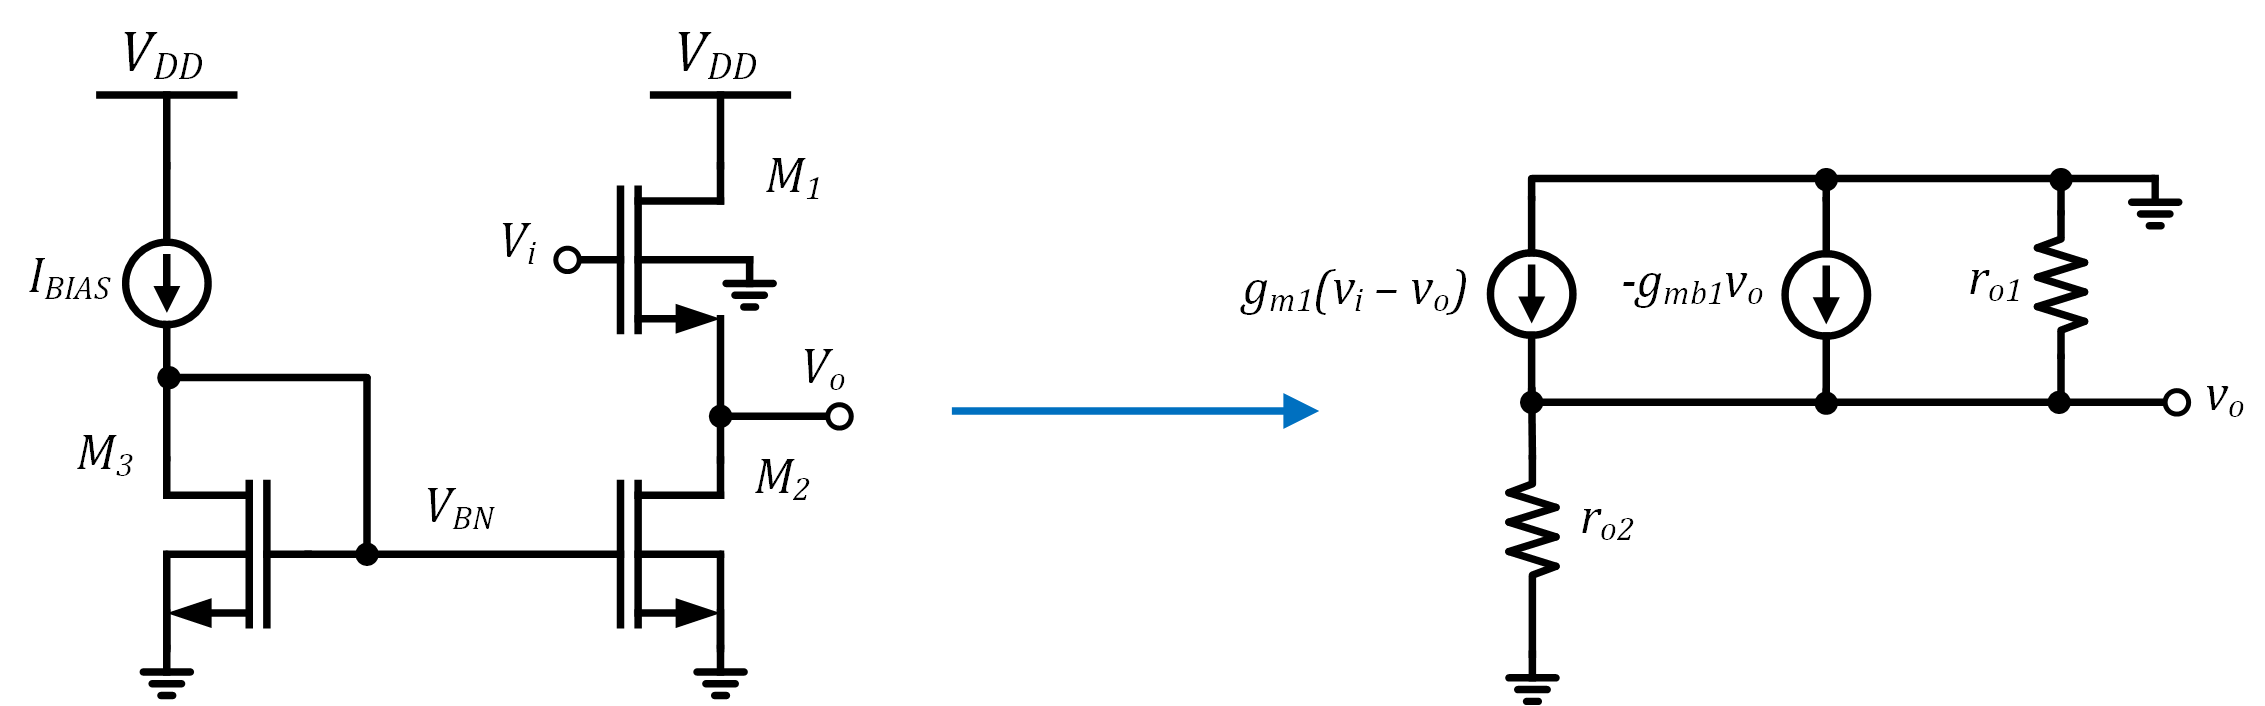

 - $M_1$ constitutes the "gain" device, meaning that the signal is conveyed via its transconductance $g_{m1}$
 
 - The $DC$ level output voltage is $V_{GS1}$ lower than that of the input voltage, making the minimum value of the input signal $V_{OV2} + V_{GS1}$
 
 - Body effect is present in $M_1$, due to the fact that its source is not directly connected to ground
 
 - We can again use the Norton equivalent circuit to determine the $DC$ transfer function

## Equivalent transconductance (G<sub>m</sub>)

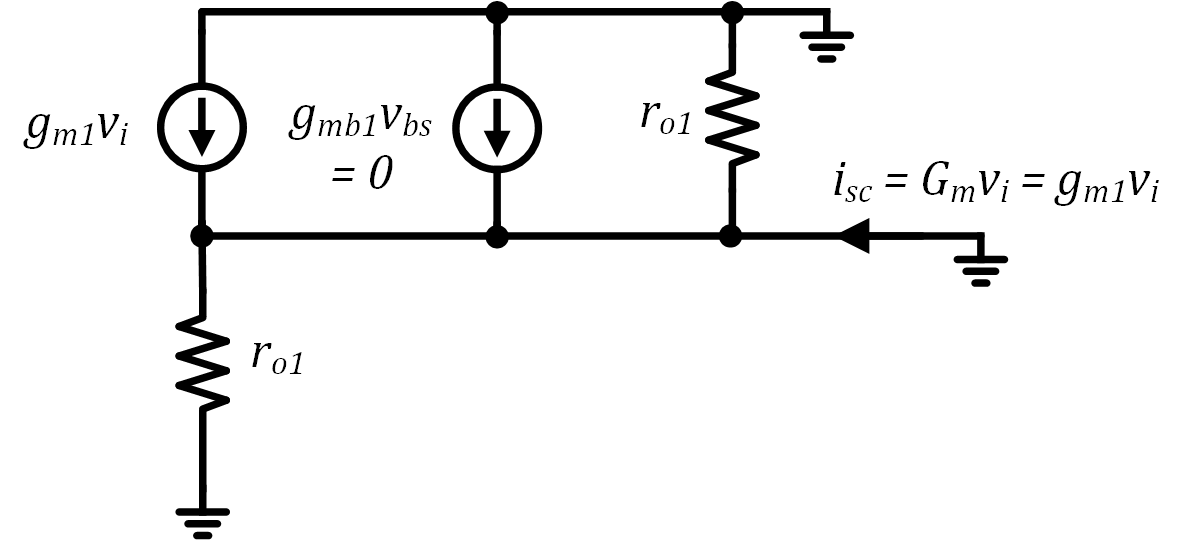

\begin{align}
G_m &= \dfrac{i_{sc}}{v_i}\\
\\
&= -\dfrac{g_{m1}\cdot v_i}{v_i} = \boxed{ -g_{m1} }
\end{align}

 - For determination of $G_m$, we short-circuit the output and use the ratio of $i_{sc}$ to $v_i$
 - The $g_{mb}$, $r_{o1}$, and $r_{o2}$ contributions to $i_{sc}$ disappear (i.e. they do not contribute), since $v_{sb1} = v_{ds1} = v_{ds2} = 0$
 - As with the common-source amplifier, the equivalent transconductance $G_m$ is equal to $g_{m1}$, but the polarity is reversed (i.e. the source-follower is a non-inverting structure)
 

## Equivalent resistance (R<sub>o</sub>)

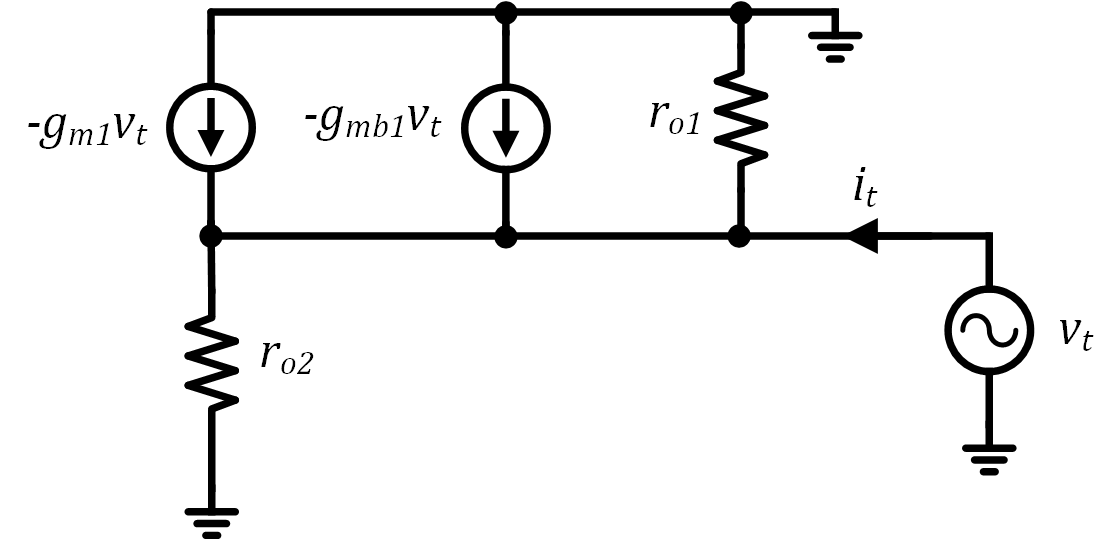

 - The "test current" $i_t$ is the sum of contributions from $r_{o1}$, $r_{o2}$ and $g_{m1}$, $g_{mb1}$

\begin{align}
i_t &= \dfrac{v_t}{r_{o1}} + (g_{mb1} + g_{m1})v_t + \dfrac{v_t}{r_{o2}}\\
\end{align}

- Because each contribution has a linear relationship with $v_t$, the equivalent output resistance can be expressed as the parallel combination of 4 individual resistances

\begin{align}
R_o &= \dfrac{v_t}{i_t} \\
&= r_{o1}||r_{o2}||\dfrac{1}{g_{m1}}||\dfrac{1}{g_{mb1}}
\end{align}

 - If we make use of the fact that $g_m r_o >> 1$ for any useful $MOS$ transistor, the output impedance can be approximated as
 
\begin{equation}
R_o = r_{o1}||r_{o2}||\dfrac{1}{g_{m1}}||\dfrac{1}{g_{mb1}} \approx \boxed{ \dfrac{1}{g_{m1} + g_{mb1}} }
\end{equation}

## Source follower gain

 - Using our Norton model approach, the gain is determined as
 
\begin{equation}
A_v = -G_m R_o = g_{m1}\cdot \dfrac{1}{g_{m1} + g_{mb1}}
\end{equation}

 - If, for example, $g_{mb1} = 0.1 g_{m1}$, then $A_v \approx 0.9$
 - In the ideal case, the source follower provides unity gain while presenting a lot output impedance to resistive loads
 - Given the relationship between $g_m$ and drain current $I_{D1}$, we can see that decreasing the output impedance (and thus increasing the load driving capability) requires an increase in power dissipation:
 
\begin{equation}
\dfrac{1}{g_{m1}} = \dfrac{V_{OV1}}{2I_{D1}}
\end{equation}

## Where we're headed

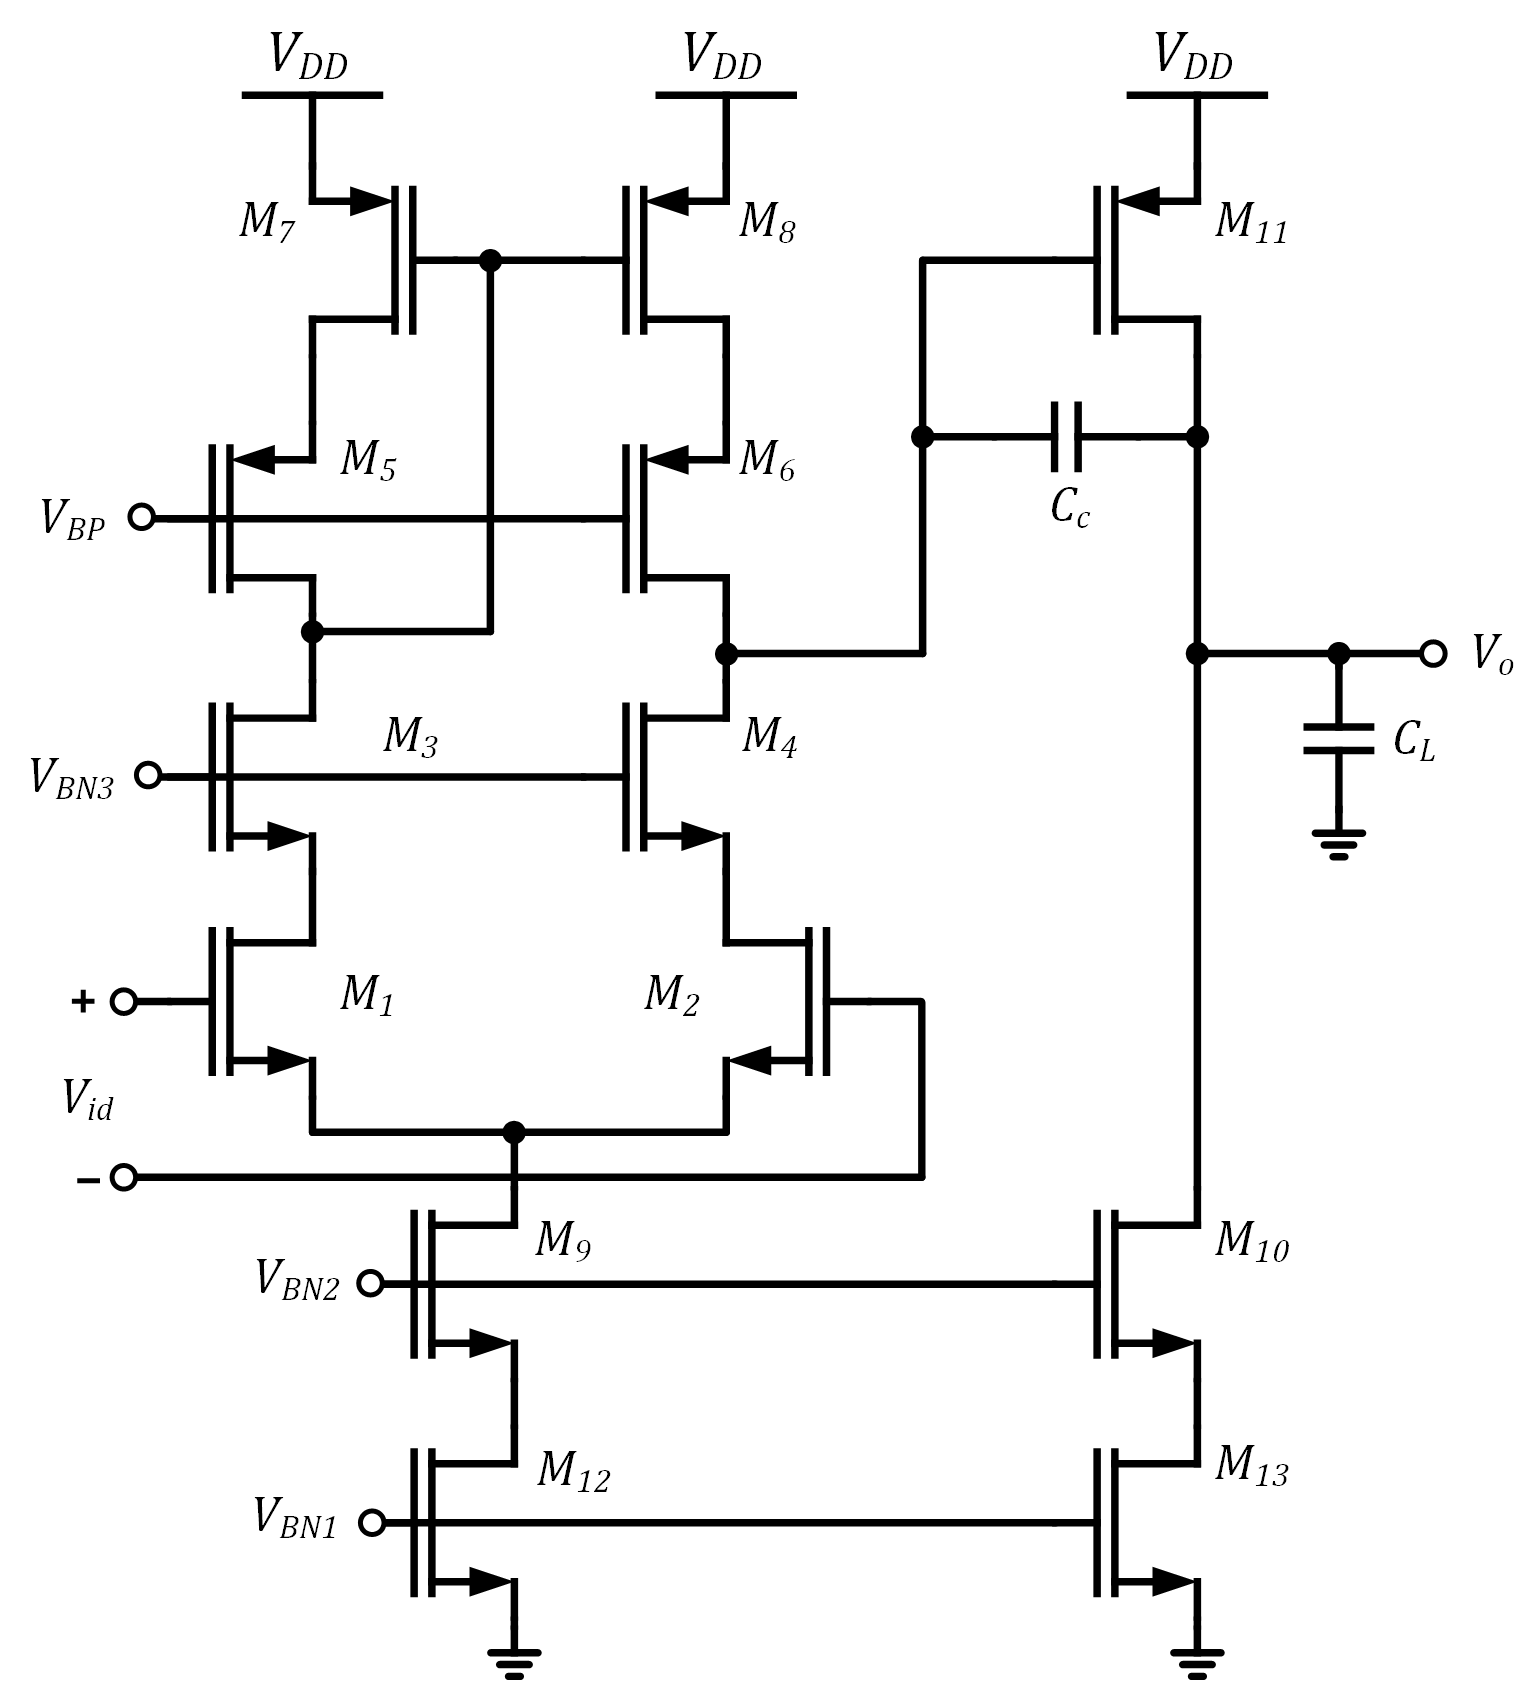

 - We want to create a high-gain amplifier with differential inputs, referred to either as an opamp or an *operational transconductance amplifier (OTA)*
 
 - $M_1$, $M_2$, and $M_{11}$ are used as transconductance (gain) transistors
 
 - $M_{7,8}$ and $M_{12,13}$ act as current sources, while $M_{3,4}$, $M_{5,6}$, and $M_{9,10}$ are used as cascode devices
 
 - $C_c$ is a "compensation" capacitor that sets the bandwidth of the amplifier
 
 - $C_L$ is a load capacitor, representing the capacitance associated with potential interface circuitry
 
 - With this structure (or something very similar), we can use feedback to realize precise voltage gain for various applications

## Summary

 - Current source precision and high gain both require current sources with high output impedance
 
 - Cascode current sources provide this, but the simple cascode mirror substantially reduces headroom
     
     - The minimum voltage required for a standard cascode current source is $V_{GS} + V_{OV}$
 
 - Cascode bias structures can be used that result in a cascode current source overhead approximately equal to $2V_{OV}$
 - Source followers are used to buffer high-gain circuits from low-impedance loads (output impedance scales inversely with power)